In [1]:
# Import Modules
import numpy as np 
import pandas as pd 
from pathlib import Path

In [2]:
# Read in the orbits csv file into a pandas dataframe
orbits_df = pd.read_csv(Path("orbits.csv"))
orbits_df.head()
        

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16
1,719 Albert,Amor Asteroid,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50
2,887 Alinda,Amor Asteroid,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40
3,1036 Ganymed,Amor Asteroid,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45
4,1221 Amor,Amor Asteroid,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70


In [3]:
# Split column with "hazard"
orbits_df[["Object Classification", "Hazard"]] = orbits_df['Object Classification'].str.split('(', n=1, expand=True)

In [4]:
orbits_df["Object Classification"] = orbits_df["Object Classification"].str.strip()

In [5]:
orbits_df.isnull().sum()

Object Name                                     3
Object Classification                           2
Epoch (TDB)                                     3
Orbit Axis (AU)                                 3
Orbit Eccentricity                              3
Orbit Inclination (deg)                         3
Perihelion Argument (deg)                       3
Node Longitude (deg)                            3
Mean Anomoly (deg)                              3
Perihelion Distance (AU)                        3
Aphelion Distance (AU)                          3
Orbital Period (yr)                             3
Minimum Orbit Intersection Distance (AU)        3
Orbital Reference                               3
Asteroid Magnitude                              4
Hazard                                      13859
dtype: int64

In [6]:
# Drop nulls
orbits_df.dropna(subset=["Object Name"], inplace=True)

In [7]:
orbits_df.isnull().sum()

Object Name                                     0
Object Classification                           0
Epoch (TDB)                                     0
Orbit Axis (AU)                                 0
Orbit Eccentricity                              0
Orbit Inclination (deg)                         0
Perihelion Argument (deg)                       0
Node Longitude (deg)                            0
Mean Anomoly (deg)                              0
Perihelion Distance (AU)                        0
Aphelion Distance (AU)                          0
Orbital Period (yr)                             0
Minimum Orbit Intersection Distance (AU)        0
Orbital Reference                               0
Asteroid Magnitude                              1
Hazard                                      13856
dtype: int64

In [8]:
# Drop 9
orbits_df.dropna(subset=["Asteroid Magnitude"], inplace=True)

In [9]:
orbits_df.isnull().sum()

Object Name                                     0
Object Classification                           0
Epoch (TDB)                                     0
Orbit Axis (AU)                                 0
Orbit Eccentricity                              0
Orbit Inclination (deg)                         0
Perihelion Argument (deg)                       0
Node Longitude (deg)                            0
Mean Anomoly (deg)                              0
Perihelion Distance (AU)                        0
Aphelion Distance (AU)                          0
Orbital Period (yr)                             0
Minimum Orbit Intersection Distance (AU)        0
Orbital Reference                               0
Asteroid Magnitude                              0
Hazard                                      13855
dtype: int64

In [10]:
orbits_df.head(10)

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazard
0,433 Eros,Amor Asteroid,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,None
1,719 Albert,Amor Asteroid,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,None
2,887 Alinda,Amor Asteroid,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,None
3,1036 Ganymed,Amor Asteroid,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,None
4,1221 Amor,Amor Asteroid,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,None
5,1566 Icarus,Apollo Asteroid,57800.0,1.0781,0.8269,22.8255,31.3830,88.0107,215.5288,0.1867,1.97,1.12,0.0345,100.0,16.90,Hazard)
6,1580 Betulia,Amor Asteroid,57800.0,2.1973,0.4875,52.0908,159.4852,62.2921,191.9105,1.1260,3.27,3.26,0.1361,191.0,14.80,None
7,1620 Geographos,Apollo Asteroid,57800.0,1.2453,0.3353,13.3375,276.8930,337.2080,104.1556,0.8277,1.66,1.39,0.0307,449.0,15.60,Hazard)
8,1627 Ivar,Amor Asteroid,57800.0,1.8628,0.3966,8.4512,167.7730,133.1445,151.4603,1.1241,2.60,2.54,0.1124,635.0,13.20,None
9,1685 Toro,Apollo Asteroid,54520.0,1.3673,0.4359,9.3807,127.0826,274.3396,48.6229,0.7713,1.96,1.60,0.0504,355.0,14.23,None


In [11]:
orbits_df.drop(['Object Name'],axis=1, inplace=True)


In [12]:
orbits_df.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazard
0,Amor Asteroid,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,None
1,Amor Asteroid,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,None
2,Amor Asteroid,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,None
3,Amor Asteroid,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,None
4,Amor Asteroid,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,None


In [13]:
# Use get dummies to convert Hazard column to binary values
hazard_type = pd.get_dummies(orbits_df['Hazard'], dtype=int)
hazard_type

,Hazard)
0,0
1,0
2,0
3,0
4,0
...,...
15630,0
15631,0
15632,0
15633,0


In [14]:
hazard_type.value_counts()

Hazard)
0          13855
1           1779
Name: count, dtype: int64

In [15]:
orbits2_df = pd.concat([orbits_df, hazard_type], axis=1)
orbits2_df.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazard,Hazard)
0,Amor Asteroid,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,None,0
1,Amor Asteroid,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,None,0
2,Amor Asteroid,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,None,0
3,Amor Asteroid,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,None,0
4,Amor Asteroid,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,None,0


In [16]:
# Rename hazard_type column
orbits3_df = orbits2_df.rename(columns={"Hazard)":"Hazardous"})
orbits3_df.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazard,Hazardous
0,Amor Asteroid,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,None,0
1,Amor Asteroid,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,None,0
2,Amor Asteroid,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,None,0
3,Amor Asteroid,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,None,0
4,Amor Asteroid,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,None,0


In [17]:
orbits3_df = orbits3_df.drop(["Hazard"], axis=1)
orbits3_df.tail()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
15630,Apollo Asteroid,57800.0,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2.0,28.21,0
15631,Amor Asteroid,57789.0,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2.0,20.04,0
15632,Amor Asteroid,57800.0,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1.0,24.74,0
15633,Apollo Asteroid,57793.0,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1.0,26.95,0
15634,Apollo Asteroid,57800.0,2.8043,0.6672,4.7249,234.1260,183.5747,349.5302,0.9332,4.68,4.70,0.0288,16.0,20.40,1


In [18]:
# Use get dummies to convert Object classification to binary values
obj_class_df = pd.get_dummies(orbits_df['Object Classification'], dtype=int)
obj_class_df

,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
15630,0,0,1,0
15631,1,0,0,0
15632,1,0,0,0
15633,0,0,1,0


In [19]:
#Concatonate orbits3_df with obj_class_df
orbits4_df = pd.concat([orbits3_df, obj_class_df], axis=1)
orbits4_df.head()

,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid
0,Amor Asteroid,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,0,1,0,0,0
1,Amor Asteroid,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,0,1,0,0,0
2,Amor Asteroid,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,0,1,0,0,0
3,Amor Asteroid,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,0,1,0,0,0
4,Amor Asteroid,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,0,1,0,0,0


In [20]:
orbits4_df = orbits4_df.drop(["Object Classification"], axis=1)
orbits4_df.head()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid
0,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,0,1,0,0,0
1,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,0,1,0,0,0
2,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,0,1,0,0,0
3,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,0,1,0,0,0
4,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,0,1,0,0,0


In [21]:
# Import dependencies for correlation visualization
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

<Axes: >

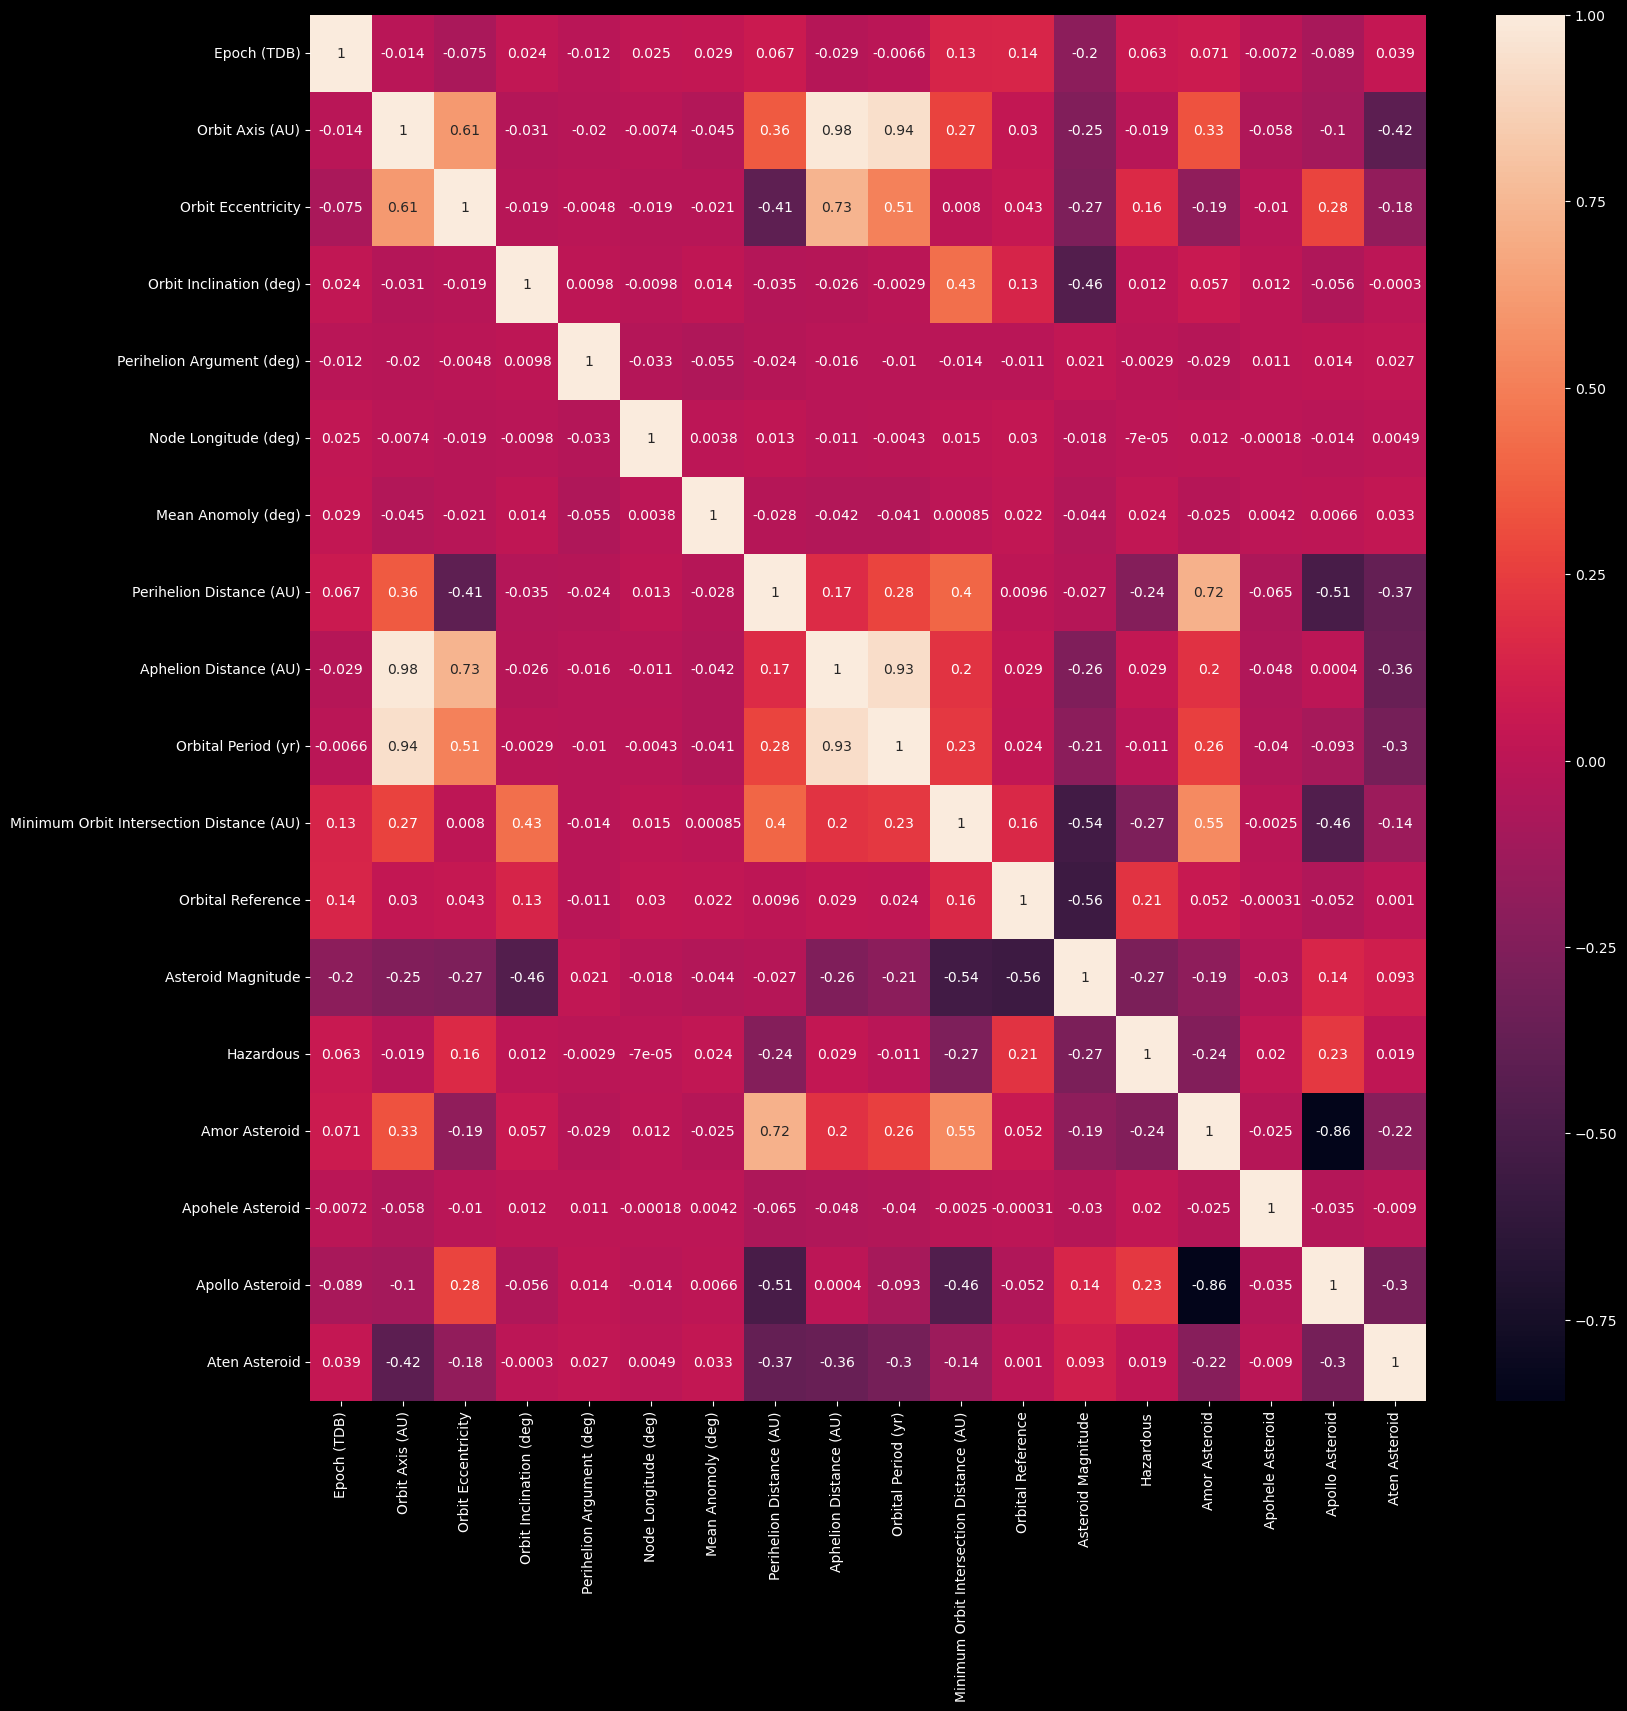

In [22]:
# Heatmap of correlation
plt.figure(figsize = (18,18))
sns.heatmap(orbits4_df.corr(),annot = True)

In [23]:
 # Get the target variables. 
target = orbits4_df["Hazardous"]
target_names = ["safe", "hazard"]

In [24]:
 # Get the features. 
data = orbits4_df.drop("Hazardous", axis=1)
feature_names = data.columns
data.head()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Amor Asteroid,Apohele Asteroid,Apollo Asteroid,Aten Asteroid
0,57800.0,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598.0,11.16,1,0,0,0
1,57800.0,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78.0,15.50,1,0,0,0
2,57800.0,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188.0,13.40,1,0,0,0
3,57800.0,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597.0,9.45,1,0,0,0
4,57800.0,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70.0,17.70,1,0,0,0


In [25]:
 # Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [26]:
 # Creating StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [28]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
X_train_scaled

array([[ 0.37419918,  0.65850006,  0.70467427, ..., -0.02771607,
         0.9270061 , -0.28222348],
       [ 0.37419918, -0.85148252, -1.37531894, ..., -0.02771607,
        -1.07874155, -0.28222348],
       [ 0.37419918,  2.27439113,  0.7875561 , ..., -0.02771607,
        -1.07874155, -0.28222348],
       ...,
       [ 0.37419918, -1.42751291,  1.58288101, ..., -0.02771607,
        -1.07874155,  3.54329131],
       [ 0.37419918,  1.19520798,  2.50196098, ..., -0.02771607,
         0.9270061 , -0.28222348],
       [ 0.37419918, -1.56120928, -1.35090854, ..., -0.02771607,
        -1.07874155,  3.54329131]])

In [30]:
orbits_df_scaled = StandardScaler().fit_transform(
    orbits_df[["Epoch (TDB)", "Orbit Axis (AU)", "Orbit Eccentricity", "Orbit Inclination (deg)", "Perihelion Argument (deg)", "Node Longitude (deg)",
               "Mean Anomoly (deg)", "Perihelion Distance (AU)", "Aphelion Distance (AU)", "Orbital Period (yr)", "Minimum Orbit Intersection Distance (AU)",
              "Orbital Reference", "Asteroid Magnitude"]]
)

In [31]:
 # Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.880


In [33]:
 # Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

        safe       0.88      1.00      0.94      3449
      hazard       0.29      0.02      0.03       460

    accuracy                           0.88      3909
   macro avg       0.59      0.51      0.48      3909
weighted avg       0.81      0.88      0.83      3909



In [34]:
 from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[3432,   17],
       [ 453,    7]])